<a href="https://colab.research.google.com/github/lenkomfort/uev-repository/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22test_colab_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Работа в google colab

Доброго времени суток!

В этом файле приведен код, который загружает датасет с сайта Kaggle.com и строит на основании его данных некоторые графики.

## Выгрузка данных

Ссылка на датасет по продажам кофе
https://www.kaggle.com/datasets/tan5577/coffee-sales-csv

In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("tan5577/coffee-sales-csv")

print("Path to dataset files:", path)

# # List files in the downloaded directory to help find the CSV file
# print("\nFiles in the downloaded dataset directory:")
# try:
#     for root, dirs, files in os.walk(path):
#         level = root.replace(path, '').count(os.sep)
#         indent = ' ' * 4 * (level)
#         print(f'{indent}{os.path.basename(root)}/')
#         subindent = ' ' * 4 * (level + 1)
#         for f in files:
#             print(f'{subindent}{f}')
# except Exception as e:
#     print(f"Error listing files: {e}")


# Construct the full path to the CSV file using the correct filename found
csv_file_path = os.path.join(path, "Coffe_sales.csv")

# Load the CSV file into a pandas DataFrame
try:
    df_coffee = pd.read_csv(csv_file_path)

    # Display the DataFrame as a table
    print("\nПервые 5 строк загруженного датасета:")
    display(df_coffee.head())

except FileNotFoundError:
    print(f"\nОшибка: Файл '{csv_file_path}' не найден.")
    print("Пожалуйста, проверьте имя файла в скачанном датасете.")
except Exception as e:
    print(f"\nПроизошла ошибка при загрузке файла: {e}")

Using Colab cache for faster access to the 'coffee-sales-csv' dataset.
Path to dataset files: /kaggle/input/coffee-sales-csv

Первые 5 строк загруженного датасета:


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,3/1/2024,15:50.5
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,19:22.5
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,20:18.1
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,3/1/2024,46:33.0
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,3/1/2024,48:14.6


## Построение диграммы зависимости продаж кофе от часа

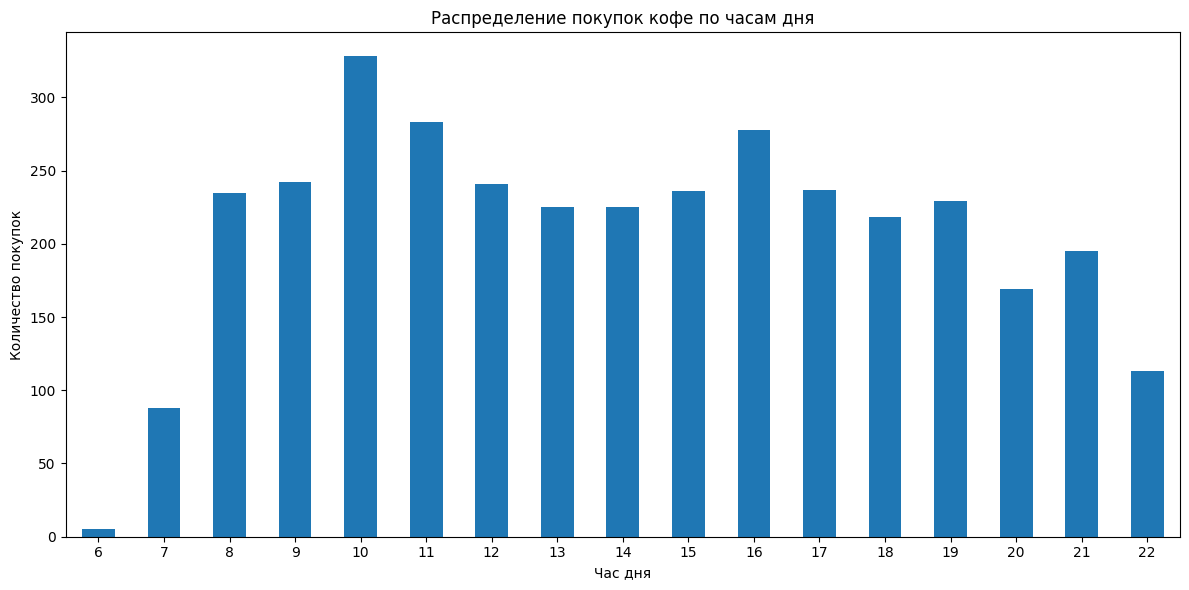

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Убедитесь, что df_coffee загружен и доступен
if 'df_coffee' in locals():
    # Подсчитайте количество покупок для каждого часа дня
    hour_of_day_counts = df_coffee['hour_of_day'].value_counts().sort_index()

    # Создайте столбиковую диаграмму
    plt.figure(figsize=(12, 6))
    hour_of_day_counts.plot(kind='bar')
    plt.title('Распределение покупок кофе по часам дня')
    plt.xlabel('Час дня')
    plt.ylabel('Количество покупок')
    plt.xticks(rotation=0) # Повернуть метки по оси X для лучшей читаемости

    # Покажите диаграмму
    plt.tight_layout() # Автоматически настроить параметры области построения для плотного размещения
    plt.show()
else:
    print("DataFrame df_coffee не найден. Пожалуйста, загрузите датасет сначала.")

## Построение диграммы зависимости суммарной выручки от продаж кофе от часа дня

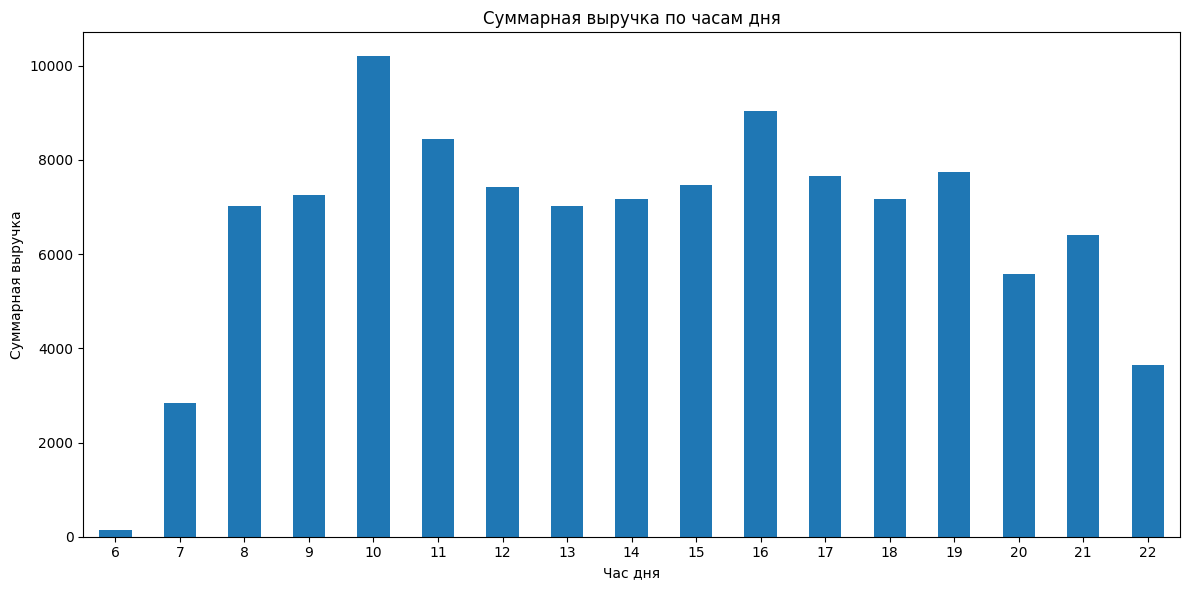

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Убедитесь, что df_coffee загружен и доступен
if 'df_coffee' in locals():
    # Сгруппируйте данные по часу дня и просуммируйте выручку
    hourly_revenue = df_coffee.groupby('hour_of_day')['money'].sum()

    # Создайте столбиковую диаграмму
    plt.figure(figsize=(12, 6))
    hourly_revenue.plot(kind='bar')
    plt.title('Суммарная выручка по часам дня')
    plt.xlabel('Час дня')
    plt.ylabel('Суммарная выручка')
    plt.xticks(rotation=0) # Повернуть метки по оси X для лучшей читаемости

    # Покажите диаграмму
    plt.tight_layout() # Автоматически настроить параметры области построения для плотного размещения
    plt.show()
else:
    print("DataFrame df_coffee не найден. Пожалуйста, загрузите датасет сначала.")

## Построение тепловой карты, которая показывает, какие виды кофе популярны в определенные часы дня.

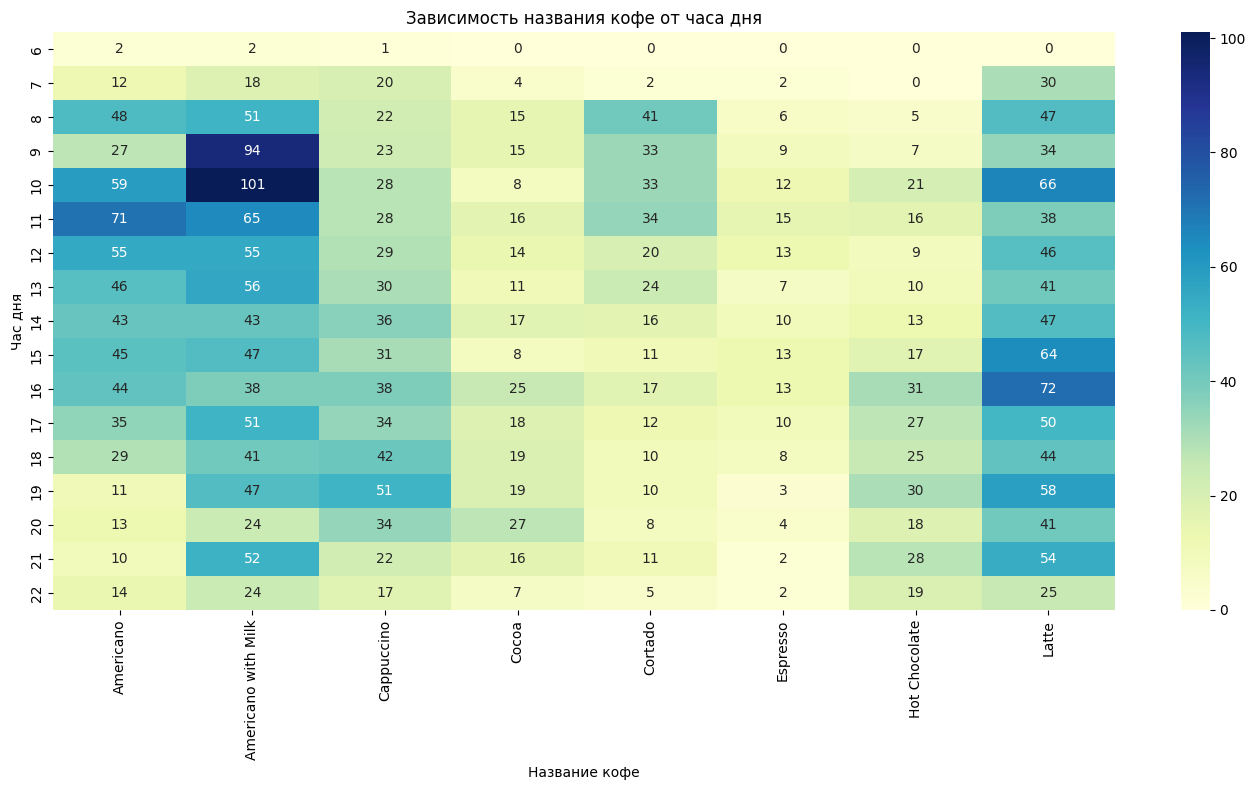

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Убедитесь, что df_coffee загружен и доступен
if 'df_coffee' in locals():
    # Сгруппируйте данные по часу дня и названию кофе и подсчитайте количество
    coffee_hour_counts = df_coffee.groupby(['hour_of_day', 'coffee_name']).size().unstack(fill_value=0)

    # Создайте тепловую карту
    plt.figure(figsize=(14, 8))
    sns.heatmap(coffee_hour_counts, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('Зависимость названия кофе от часа дня')
    plt.xlabel('Название кофе')
    plt.ylabel('Час дня')

    # Покажите диаграмму
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame df_coffee не найден. Пожалуйста, загрузите датасет сначала.")